<a href="https://colab.research.google.com/github/UshaswiniMasetty/20NN1A1297-Ushaswini/blob/main/CustomerChurnPredictionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas sklearn scikit-learn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
!pip install xgboost

In [ ]:
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 68.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.6 MB/s eta 0:00:00


In [ ]:
import numpy as np # linear algebra
from scipy import stats # statistic library
import pandas as pd # To table manipulations
import seaborn as sns
import matplotlib.pyplot as plt

# Standard plotly imports
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import cufflinks as cf
import plotly.figure_factory as ff

#Extra modules to aviod blank output by colab
import plotly.io as pio
pio.renderers.default = 'colab'

# Using plotly + cufflinks in offline mode
init_notebook_mode(connected=True)
cufflinks.go_offline(connected=True)

import os

#Importing the auxiliar and preprocessing librarys
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding


In [ ]:
def binary_ploting_distributions(df, cat_col):
    from plotly import tools
    import plotly.io as pio
    pio.renderers.default = 'colab'
    fig = tools.make_subplots(rows=1,
                              cols=2,
                              print_grid=True,
                              horizontal_spacing=0.15,
                              subplot_titles=("Distribution of and % Churn",
                                              f'Mean Monthly Charges of {cat_col}')
                             )

    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]
    tmp_attr = round(tmp_churn[cat_col].value_counts().sort_index() / df_train[cat_col].value_counts().sort_index(),2)*100

    trace1 = go.Bar(
        x=tmp_churn[cat_col].value_counts().sort_index().index,
        y=tmp_churn[cat_col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[cat_col].value_counts().sort_index().index,
        y=tmp_no_churn[cat_col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8,
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean().reset_index())

    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby(['Churn', cat_col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100

    trace4 = go.Bar(
        x=tmp_churn[cat_col],
        y=tmp_churn['MonthlyCharges'], showlegend=False,
        name='Mean Charge Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace5 = go.Bar(
        x=tmp_no_churn[cat_col],
        y=tmp_no_churn['MonthlyCharges'],showlegend=False,
        name='Mean Charge NoChurn', opacity = 0.8,
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace6 =  go.Scatter(
        x=df_tmp[cat_col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )

    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 1)
    fig.append_trace(trace3, 1, 1)
    fig.append_trace(trace4, 1, 2)
    fig.append_trace(trace5, 1, 2)
    fig.append_trace(trace6, 1, 2)

    fig['data'][2].update(yaxis='y3')
    fig['data'][5].update(yaxis='y4')

    fig['layout']['xaxis'].update(autorange=True,
                                   tickfont=dict(size= 10),
                                   title= f'{cat_col}',
                                   type= 'category',
                                  )
    fig['layout']['yaxis'].update(title= 'Count')

    fig['layout']['xaxis2'].update(autorange=True,
                                   tickfont=dict(size= 10),
                                   title= f'{cat_col}',
                                   type= 'category',
                                  )
    fig['layout']['yaxis2'].update( title= 'Mean Monthly Charges' )

    fig['layout']['yaxis3']=dict(range= [0, 100], #right y-axis in subplot (1,1)
                              overlaying= 'y',
                              anchor= 'x',
                              side= 'right',
                              showgrid= False,
                              title= '%Churn Ratio'
                             )

    #Insert a new key, yaxis4, and the associated value:
    fig['layout']['yaxis4']=dict(range= [-20, 100], #right y-axis in the subplot (1,2)
                              overlaying= 'y2',
                              anchor= 'x2',
                              side= 'right',
                              showgrid= False,
                              title= 'Monhtly % Difference'
                             )
    fig['layout']['title'] = f"{cat_col} Distributions"
    fig['layout']['height'] = 500
    fig['layout']['width'] = 1000

    iplot(fig)

def plot_dist_churn(df, col, binary=None):
    tmp_churn = df[df[binary] == 1]
    tmp_no_churn = df[df[binary] == 0]
    tmp_attr = round(tmp_churn[col].value_counts().sort_index() / df[col].value_counts().sort_index(),2)*100
    print(f'Distribution of {col}: ')
    trace1 = go.Bar(
        x=tmp_churn[col].value_counts().sort_index().index,
        y=tmp_churn[col].value_counts().sort_index().values,
        name='Yes_Churn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col].value_counts().sort_index().index,
        y=tmp_no_churn[col].value_counts().sort_index().values,
        name='No_Churn', opacity = 0.8,
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(
        x=tmp_attr.sort_index().index,
        y=tmp_attr.sort_index().values,
        yaxis = 'y2',
        name='% Churn', opacity = 0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=2 )
        )
    )

    layout = dict(title =  f'Distribution of {str(col)} feature by Target - With Churn Rates',
              xaxis=dict(),
              yaxis=dict(title= 'Count'),
              yaxis2=dict(range= [0, 100],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= 'Percentual Churn Ratio'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)


def plot_distribution(df, var_select=None, bins=1.0):
    # Calculate the correlation coefficient between the new variable and the target
    tmp_churn = df[df['Churn'] == 1]
    tmp_no_churn = df[df['Churn'] == 0]
    corr = df_train['Churn'].corr(df_train[var_select])
    corr = np.round(corr,3)
    tmp1 = tmp_churn[var_select].dropna()
    tmp2 = tmp_no_churn[var_select].dropna()
    hist_data = [tmp1, tmp2]

    group_labels = ['Yes_churn', 'No_churn']
    colors = ['seagreen','indianred', ]

    fig = ff.create_distplot(hist_data,
                             group_labels,
                             colors = colors,
                             show_hist = True,
                             curve_type='kde',
                             bin_size = bins
                            )

    fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    iplot(fig, filename = 'Density plot')

def monthly_charges(df, col, binary=None):
    #(df_train.groupby(['Churn', 'tenure'])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean().reset_index())

    tmp_churn = df_tmp[df_tmp['Churn'] == 1]
    tmp_no_churn = df_tmp[df_tmp['Churn'] == 0]

    df_tmp = (df_train.groupby([binary, col])['MonthlyCharges'].mean()).unstack('Churn').reset_index()
    df_tmp['diff_rate'] = round((df_tmp[1] / df_tmp[0]) - 1,2) * 100

    trace1 = go.Bar(
        x=tmp_churn[col],
        y=tmp_churn['MonthlyCharges'],
        name='Mean Charge\nChurn',opacity = 0.8, marker=dict(
            color='seagreen',
            line=dict(color='#000000',width=1)))

    trace2 = go.Bar(
        x=tmp_no_churn[col],
        y=tmp_no_churn['MonthlyCharges'],
        name='Mean Charge No Churn', opacity = 0.8,
        marker=dict(
            color='indianred',
            line=dict(color='#000000',
                      width=1)
        )
    )

    trace3 =  go.Scatter(
        x=df_tmp[col],
        y=df_tmp['diff_rate'],
        yaxis = 'y2',
        name='% Diff Churn', opacity = 0.6,
        marker=dict(
            color='black',
            line=dict(color='#000000',
                      width=5 )
        )
    )

    layout = dict(title =  f'Mean Monthly Charges of {str(col)} feature by Churn or Not Churn Customers - With Churn Ratio',
              xaxis=dict(),
              yaxis=dict(title= 'Mean Monthly Charges'),
              yaxis2=dict(range= [0, 100],
                          overlaying= 'y',
                          anchor= 'x',
                          side= 'right',
                          zeroline=False,
                          showgrid= False,
                          title= '% diff Monthly Charges Mean'
                         ))

    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    iplot(fig)

In [ ]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv


{'WA_Fn-UseC_-Telco-Customer-Churn (1).csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check

In [ ]:
df_train = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)

    return summary

In [ ]:
resumetable(df_train)

Dataset Shape: (7043, 21)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,customerID,object,0,7043,7590-VHVEG,5575-GNVDE,3668-QPYBK,3.85
1,gender,object,0,2,Female,Male,Male,0.30
2,SeniorCitizen,int64,0,2,0,0,0,0.19
3,Partner,object,0,2,Yes,No,No,0.30
4,Dependents,object,0,2,No,No,No,0.27
5,tenure,int64,0,73,1,34,2,1.78
6,PhoneService,object,0,2,No,Yes,Yes,0.14
7,MultipleLines,object,0,3,No phone service,No,No,0.41
8,InternetService,object,0,3,DSL,DSL,DSL,0.46
9,OnlineSecurity,object,0,3,No,Yes,Yes,0.45


In [ ]:
cat_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'Contract', 'StreamingMovies',
                'StreamingTV', 'TechSupport', 'OnlineBackup', 'OnlineSecurity',
                'InternetService', 'MultipleLines', 'DeviceProtection', 'PaymentMethod']

In [ ]:
import plotly.io as pio
pio.renderers.default = 'colab'
print("CUSTOMERS %CHURN:")
print(round(df_train['Churn'].value_counts(normalize=True) * 100,2))
# df_train.groupby('Churn')['customerID'].count().iplot(kind='bar', title='Churn (Target) Distribution',
#                                                      xTitle='Customer Churn?', yTitle='Count')

trace0 = go.Bar(
    x=df_train.groupby('Churn')['customerID'].count().index,
    y=df_train.groupby('Churn')['customerID'].count().values,
    marker=dict(
        color=['indianred', 'seagreen']),
)

data = [trace0]
layout = go.Layout(
    title='Churn (Target) Distribution',
    xaxis=dict(
        title='Customer Churn?'),
    yaxis=dict(
        title='Count')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

CUSTOMERS %CHURN:
No     73.46
Yes    26.54
Name: Churn, dtype: float64


In [ ]:
df_train['TotalCharges'].fillna(df_train['MonthlyCharges'], inplace=True)
df_train['Churn'] = df_train.Churn.replace({'Yes': 1, 'No': 0})
print(f"The mininum value in Monthly Charges is {df_train['MonthlyCharges'].min()} and the maximum is {df_train['MonthlyCharges'].max()}")
print(f"The mean Monthly Charges of Churn Customers is {round(df_train[df_train['Churn'] != 0]['MonthlyCharges'].mean(),2)}\
      \nThe mean Monthly Charges of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['MonthlyCharges'].mean(),2)}")

plot_distribution(df_train, 'MonthlyCharges', bins=4.0)

The mininum value in Monthly Charges is 18.25 and the maximum is 118.75
The mean Monthly Charges of Churn Customers is 74.44      
The mean Monthly Charges of Non-churn Customers is 61.27


In [ ]:
for col in cat_features:
    binary_ploting_distributions(df_train, col)

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



In [ ]:
df_train['internet']= np.where(df_train.InternetService != 'No', 'Yes', 'No')

df_train['num_services'] = (df_train[['PhoneService', 'OnlineSecurity',
                                      'OnlineBackup', 'DeviceProtection',
                                      'TechSupport', 'StreamingTV',
                                      'StreamingMovies', 'internet']] == 'Yes').sum(axis=1)

In [ ]:
binary_ploting_distributions(df_train, 'num_services')

This is the format of your plot grid:
[ (1,1) x,y   ]  [ (1,2) x2,y2 ]



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:455: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN


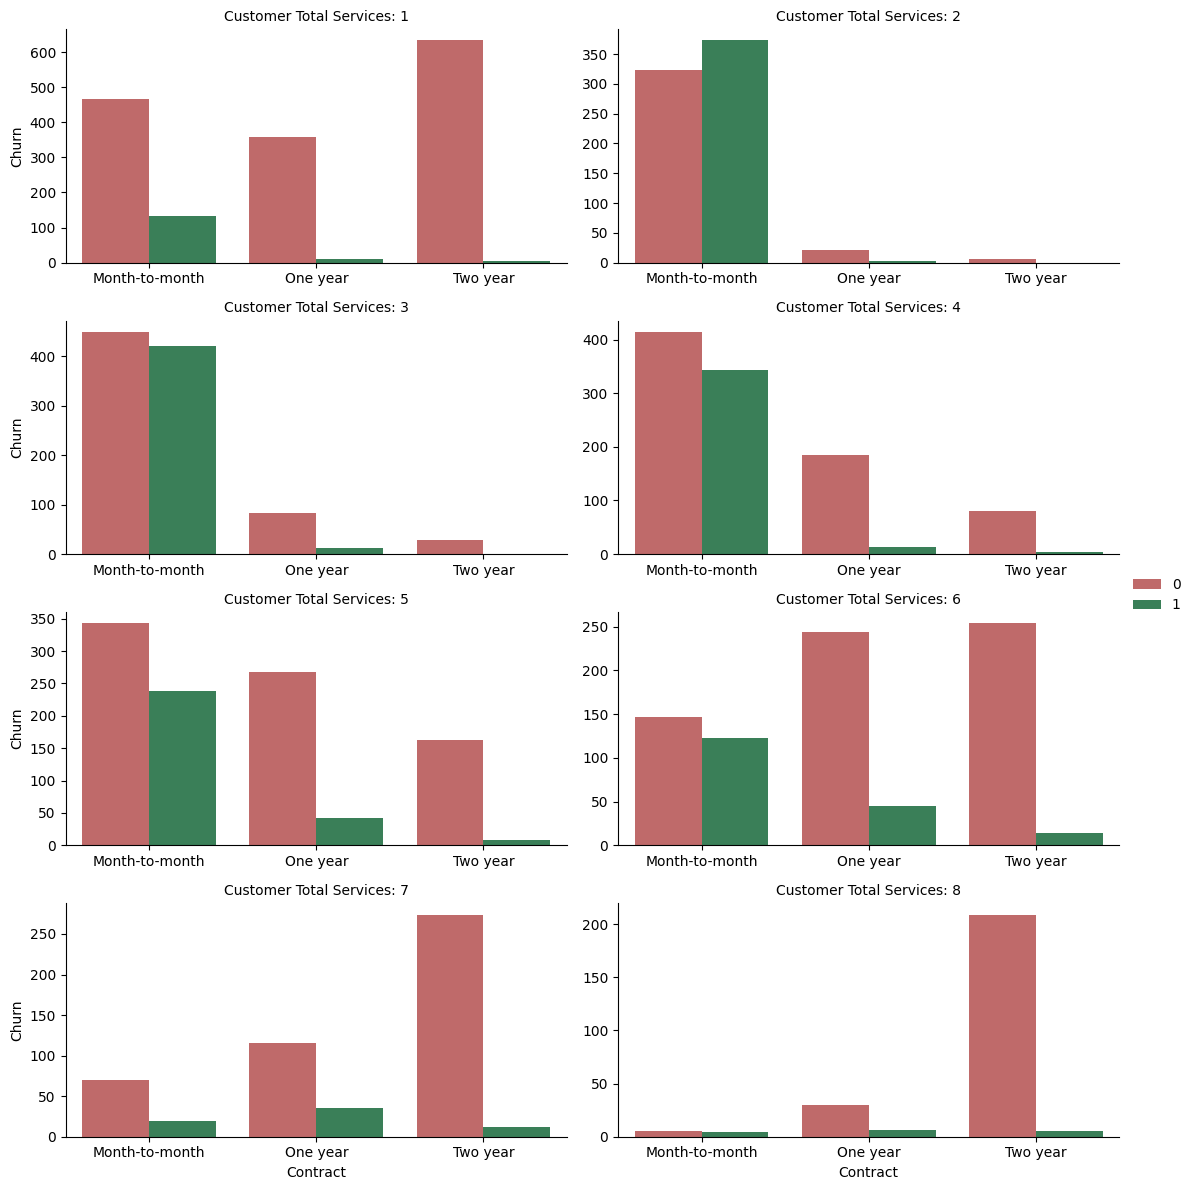

In [ ]:
def countplot(x, hue, **kwargs):
    sns.countplot(x=x, hue=hue, **kwargs, order=['Month-to-month', 'One year', 'Two year'])

print("TOTAL NUMBER OF SERVICES BY CONTRACT AND CHURN")
grid = sns.FacetGrid(data=df_train,col='num_services', col_wrap=2,
                     aspect=1.9, height=3, sharey=False, sharex=False)
fig = grid.map(countplot,'Contract','Churn', palette=['indianred', 'seagreen'] )
fig.set_titles('Customer Total Services: {col_name}', fontsize=18)
fig.add_legend()

plt.show()

In [ ]:
df_train.loc[df_train['TotalCharges'] == ' ', 'TotalCharges'] = np.nan
df_train['TotalCharges'] = df_train['TotalCharges'].astype(float)

In [ ]:
print("Total Amount of Monthly Charges by each group: ")
print(round(df_train.groupby('Churn')['MonthlyCharges'].sum() ))

trace0 = go.Bar(
    x=round(df_train.groupby('Churn')['MonthlyCharges'].sum() \
      / df_train.groupby('Churn')['MonthlyCharges'].sum().sum() * 100).index,
    y=round(df_train.groupby('Churn')['MonthlyCharges'].sum() \
      / df_train.groupby('Churn')['MonthlyCharges'].sum().sum() * 100).values,
    marker=dict(
        color=['indianred', 'seagreen']),
)

data = [trace0]
layout = go.Layout(
    title='Monthly Revenue % Lost by Churn Customer or not',
    xaxis=dict(
        title='Customer Churn?', type='category'),
    yaxis=dict(
        title='% of Total Monthly Revenue')
)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


Total Amount of Monthly Charges by each group: 


NameError: name 'df_train' is not defined

In [ ]:
df_train['TotalCharges_log'] = np.log(df_train['TotalCharges']+1)
print(f"The mininum value in Total Charges is {df_train['TotalCharges'].min()} and the maximum is {df_train['TotalCharges'].max()}")
print(f"The mean Total Charges of Churn Customers is {round(df_train[df_train['Churn'] != 0]['TotalCharges'].mean(),2)}\
      \nThe mean Total Charges of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['TotalCharges'].mean(),2)}")

plot_distribution(df_train, 'TotalCharges_log', bins=.25)

The mininum value in Total Charges is 18.8 and the maximum is 8684.8
The mean Total Charges of Churn Customers is 1531.8      
The mean Total Charges of Non-churn Customers is 2555.34


In [ ]:
print(f"The mininum value in Tenure is {df_train['tenure'].min()} and the maximum is {df_train['tenure'].max()}")
print(f"The mean Tenure of Churn Customers is {round(df_train[df_train['Churn'] != 0]['tenure'].mean())}\
      \nThe mean Tenure of Non-churn Customers is {round(df_train[df_train['Churn'] == 0]['tenure'].mean())}")

plot_dist_churn(df_train, 'tenure', 'Churn')

The mininum value in Tenure is 0 and the maximum is 72
The mean Tenure of Churn Customers is 18      
The mean Tenure of Non-churn Customers is 38
Distribution of tenure: 


In [ ]:
print("MEAN MONTHLY CHARGES OF TENURE FOR CHURN OR NO CHURN CUSTOMERS")

monthly_charges(df_train, 'tenure', 'Churn')

MEAN MONTHLY CHARGES OF TENURE FOR CHURN OR NO CHURN CUSTOMERS


In [ ]:
monthly_charges(df_train, 'num_services', 'Churn')

In [ ]:
tmp_churn = df_train[df_train['Churn'] == 1]
tmp_no_churn = df_train[df_train['Churn'] == 0]

tmp_churn_fiber = tmp_churn[tmp_churn['InternetService'] == 'Fiber optic']
tmp_churn_dsl = tmp_churn[tmp_churn['InternetService'] == 'DSL']
tmp_churn_no = tmp_churn[tmp_churn['InternetService'] == 'No']

tmp_no_churn_fiber = tmp_no_churn[tmp_no_churn['InternetService'] == 'Fiber optic']
tmp_no_churn_dsl = tmp_no_churn[tmp_no_churn['InternetService'] == 'DSL']
tmp_no_churn_no = tmp_no_churn[tmp_no_churn['InternetService'] == 'No']

# Create traces
trace0 = go.Scatter(
    x = tmp_churn_fiber['tenure'],
    y = tmp_churn_fiber['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - Fiber', marker=dict(
        color='indianred', symbol='star'
))
trace1 = go.Scatter(
    x = tmp_churn_dsl['tenure'],
    y = tmp_churn_dsl['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - DSL', marker=dict(
        color='indianred', symbol='square'
))
trace2 = go.Scatter(
    x = tmp_churn_no['tenure'],
    y = tmp_churn_no['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'Churn - No', marker=dict(
        color='indianred', symbol='circle'
))

# Create traces
trace3 = go.Scatter(
    x = tmp_no_churn_fiber['tenure'],
    y = tmp_no_churn_fiber['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-Fiber', marker=dict(
        color='seagreen', symbol='star'
))
trace4 = go.Scatter(
    x = tmp_no_churn_dsl['tenure'],
    y = tmp_no_churn_dsl['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-DSL', marker=dict(
        color='seagreen', symbol='square'
))
trace5 = go.Scatter(
    x = tmp_no_churn_no['tenure'],
    y = tmp_no_churn_no['MonthlyCharges'],
    mode = 'markers', opacity=.6,
    name = 'No-Churn-No', marker=dict(
        color='seagreen', symbol='circle'
))

layout = dict(title ='Dispersion of Total Charges explained by Monthly Charges by Target',
              xaxis=dict(title='Internet Service Types'),
              yaxis=dict(title= 'Monthly Charges'))

fig = go.Figure(data = [trace0, trace3, trace1, trace4, trace2, trace5], layout=layout)
iplot(fig)

In [ ]:
df_train['assign_months'] = round(df_train['TotalCharges'] / df_train['MonthlyCharges'],0)

In [ ]:
print("Comparing Tenure and Assign Months")
pd.concat([df_train['assign_months'].describe().reset_index(),
           df_train['tenure'].describe().reset_index()['tenure']], axis=1)

Comparing Tenure and Assign Months


,index,assign_months,tenure
0,count,7043.000000,7.043000e+03
1,mean,-0.153344,-2.421273e-17
2,std,53.127905,1.000071e+00
3,min,-2867.000000,-1.318165e+00
4,25%,0.000000,-9.516817e-01
5,50%,1.000000,-1.372744e-01
6,75%,1.000000,9.214551e-01
7,max,1592.000000,1.613701e+00


In [ ]:
df_train.drop('assign_months', axis=1, inplace=True)

In [ ]:
no_churn_monthly_renenue = tmp_no_churn['MonthlyCharges'].sum()

In [ ]:
PieChart("InternetService", 'MonthlyCharges', "Internet Services Total Charges by Churn", limit=10)

In [ ]:
PieChart("Contract", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
PieChart("MultipleLines", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
PieChart("DeviceProtection", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
PieChart("TechSupport", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
PieChart("OnlineBackup", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
PieChart("OnlineSecurity", 'MonthlyCharges', "Type of Contract by Churn or not with Ratio of Monthly Charges", limit=10)

In [ ]:
Id_col     = ['customerID']

target_col = ["Churn"]

cat_cols   = df_train.nunique()[df_train.nunique() < 10].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
binary_cols   = df_train.nunique()[df_train.nunique() == 2].keys().tolist()

multi_cols = [i for i in cat_cols if i not in binary_cols]

In [ ]:
df_train.loc[:,'Engaged'] = np.where(df_train['Contract'] != 'Month-to-month', 1,0)
df_train.loc[:,'YandNotE'] = np.where((df_train['SeniorCitizen']==0) & (df_train['Engaged']==0), 1,0)
df_train.loc[:,'ElectCheck'] = np.where((df_train['PaymentMethod'] == 'Electronic check') & (df_train['Engaged']==0), 1,0)
df_train.loc[:,'fiberopt'] = np.where((df_train['InternetService'] != 'Fiber optic'), 1,0)
df_train.loc[:,'StreamNoInt'] = np.where((df_train['StreamingTV'] != 'No internet service'), 1,0)
df_train.loc[:,'NoProt'] = np.where((df_train['OnlineBackup'] != 'No') |\
                                    (df_train['DeviceProtection'] != 'No') |\
                                    (df_train['TechSupport'] != 'No'), 1,0)

df_train['TotalServices'] = (df_train[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Label encoding Binary columns
le = LabelEncoder()

tmp_churn = df_train[df_train['Churn'] == 1]
tmp_no_churn = df_train[df_train['Churn'] == 0]

bi_cs = df_train.nunique()[df_train.nunique() == 2].keys()
dat_rad = df_train[bi_cs]

for cols in bi_cs :
    tmp_churn[cols] = le.fit_transform(tmp_churn[cols])


data_frame_x = tmp_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace1 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 1's",
                         mode = "markers+lines", visible=True,
                         marker = dict(size = 5)
                        )

#count of 0's(No)
trace2 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "Churn 0's",
                         mode = "markers+lines", visible=True,
                         marker = dict(size = 5)
                        )
for cols in bi_cs :
    tmp_no_churn[cols] = le.fit_transform(tmp_no_churn[cols])

data_frame_x = tmp_no_churn[bi_cs].sum().reset_index()
data_frame_x.columns  = ["feature","yes"]
data_frame_x["no"]    = tmp_no_churn.shape[0]  - data_frame_x["yes"]
data_frame_x  = data_frame_x[data_frame_x["feature"] != "Churn"]

#count of 1's(yes)
trace3 = go.Scatterpolar(r = data_frame_x["yes"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 1's",
                         mode = "markers+lines", visible=False,
                         marker = dict(size = 5)
                        )

#count of 0's(No)
trace4 = go.Scatterpolar(r = data_frame_x["no"].values.tolist(),
                         theta = data_frame_x["feature"].tolist(),
                         fill  = "toself",name = "NoChurn 0's",
                         mode = "markers+lines", visible=False,
                         marker = dict(size = 5)
                        )

data = [trace1, trace2, trace3, trace4]

updatemenus = list([
    dict(active=0,
         x=-0.15,
         buttons=list([
            dict(
                label = 'Churn Dist',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                     {'title': 'Customer Churn Binary Counting Distribution'}]),

             dict(
                  label = 'No-Churn Dist',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                     {'title': 'No Customer Churn Binary Counting Distribution'}]),

        ]),
    )
])

layout = dict(title='ScatterPolar Distribution of Churn and Non-Churn Customers (Select from Dropdown)',
              showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)

iplot(fig)

In [ ]:
multi_cols.remove('Contract')
df_train['monthly_diff_mean'] = df_train['MonthlyCharges'] / df_train['MonthlyCharges'].mean()
for cat in cat_cols:
    df_train[str(cat)+'_diff_mean'] = df_train['MonthlyCharges'] / df_train.groupby(['Contract',cat])['MonthlyCharges'].transform('mean')
    df_train[str(cat)+'_diff_std'] = df_train['MonthlyCharges'] / df_train.groupby(['Contract',cat])['MonthlyCharges'].transform('std')

In [ ]:
for cols in binary_cols :
    df_train[cols] = le.fit_transform(df_train[cols])

#Duplicating columns for multi value columns
df_train = pd.get_dummies(data = df_train,columns = multi_cols )

df_train.drop("Contract", axis=1, inplace=True)

In [ ]:
num_cols   = [x for x in df_train.columns if x not in cat_cols + target_col + Id_col]

from sklearn.preprocessing import StandardScaler
df_train.fillna(-99, inplace=True)
#Scaling Numerical columns
ss = StandardScaler()
scl = ss.fit_transform(df_train[num_cols])
scl = pd.DataFrame(scl, columns=num_cols)

#dropping original values merging scaled values for numerical columns
# df_data_og = df_train.copy()

df_train = df_train.drop(columns = num_cols,axis = 1)
df_train = df_train.merge(scl, left_index=True, right_index=True, how = "left")

In [ ]:
# Threshold for removing correlated variables
threshold = 0.90

# Absolute value correlation matrix
corr_matrix = df_train.corr().abs()

# Getting the upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

<ipython-input-44-ed4999b09311>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
print(list(to_drop))

There are 38 columns to remove.
['StreamNoInt', 'monthly_diff_mean', 'gender_diff_mean', 'gender_diff_std', 'SeniorCitizen_diff_mean', 'SeniorCitizen_diff_std', 'Partner_diff_mean', 'Partner_diff_std', 'Dependents_diff_mean', 'Dependents_diff_std', 'PhoneService_diff_mean', 'MultipleLines_diff_std', 'OnlineSecurity_diff_std', 'OnlineBackup_diff_mean', 'OnlineBackup_diff_std', 'DeviceProtection_diff_mean', 'DeviceProtection_diff_std', 'TechSupport_diff_mean', 'TechSupport_diff_std', 'StreamingTV_diff_std', 'StreamingMovies_diff_std', 'Contract_diff_mean', 'Contract_diff_std', 'PaperlessBilling_diff_mean', 'PaperlessBilling_diff_std', 'PaymentMethod_diff_std', 'internet_diff_mean', 'internet_diff_std', 'MultipleLines_No phone service', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No

In [ ]:
df_train = df_train.drop(columns = to_drop)
print('Training shape: ', df_train.shape)

Training shape:  (7043, 55)


In [ ]:
from sklearn.model_selection import train_test_split
X_train = df_train.drop(['Churn', 'customerID'], axis=1)
y_train = df_train['Churn']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.20)

In [ ]:
clfs = []
seed = 3

clfs.append(("LogReg",
             Pipeline([("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("XGBClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())])))
clfs.append(("KNN",
             Pipeline([("Scaler", StandardScaler()),
                       ("KNN", KNeighborsClassifier())])))

clfs.append(("DecisionTreeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())])))

clfs.append(("RandomForestClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())])))

clfs.append(("GradientBoostingClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier(max_features=15,
                                                                       n_estimators=1000))])))

clfs.append(("RidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("RidgeClassifier", RidgeClassifier())])))

clfs.append(("BaggingRidgeClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("BaggingClassifier", BaggingClassifier())])))

clfs.append(("ExtraTreesClassifier",
             Pipeline([("Scaler", StandardScaler()),
                       ("ExtraTrees", ExtraTreesClassifier())])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'accuracy'
n_folds = 10

results, names  = [], []

for name, model  in clfs:
    kfold = KFold(n_splits=n_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train,
                                 cv=kfold, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),
                               cv_results.std())
    print(msg)

print("results",results)
print("names",names)

LogReg: 0.807778 (+/- 0.018311)
XGBClassifier: 0.785233 (+/- 0.016637)
KNN: 0.761450 (+/- 0.016021)
DecisionTreeClassifier: 0.724360 (+/- 0.019349)
RandomForestClassifier: 0.788435 (+/- 0.016505)
GradientBoostingClassifier: 0.783991 (+/- 0.017331)
RidgeClassifier: 0.805294 (+/- 0.015929)
BaggingRidgeClassifier: 0.777426 (+/- 0.014380)
ExtraTreesClassifier: 0.771750 (+/- 0.014266)
results [array([0.76595745, 0.81028369, 0.83510638, 0.79964539, 0.79751332,
       0.80639432, 0.82415631, 0.80461812, 0.80639432, 0.8277087 ]), array([0.7570922 , 0.7748227 , 0.81914894, 0.78900709, 0.76909414,
       0.78863233, 0.78863233, 0.77264654, 0.79751332, 0.79573712]), array([0.74113475, 0.7535461 , 0.77659574, 0.7677305 , 0.73357016,
       0.77087034, 0.78863233, 0.75666075, 0.75310835, 0.77264654]), array([0.69148936, 0.7287234 , 0.71985816, 0.71276596, 0.72824156,
       0.74422735, 0.73001776, 0.70870337, 0.76554174, 0.71403197]), array([0.7570922 , 0.76595745, 0.80496454, 0.78368794, 0.7939609


accuracy_score : 0.7551454932576295

classification report :
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1032
           1       0.55      0.47      0.51       377

    accuracy                           0.76      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.76      0.75      1409



Text(0.5, 1.0, 'CONFUSION MATRIX')

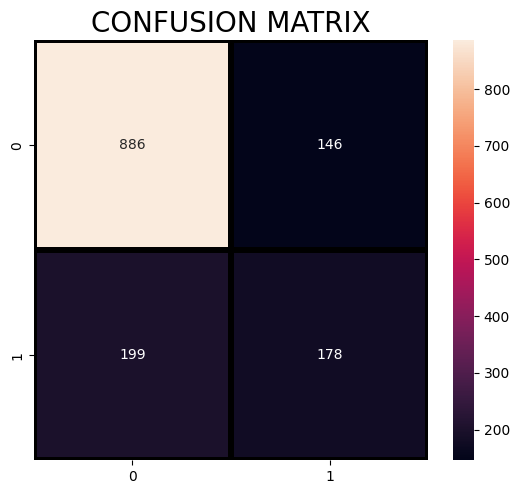

In [ ]:
xgb = XGBClassifier(n_estimators=800, n_jobs=-1)

xgb.fit(X_train.values,y_train.values)
predictions = xgb.predict(X_val.values)

print ("\naccuracy_score :",accuracy_score(y_val, predictions))

print ("\nclassification report :\n",(classification_report(y_val, predictions)))

plt.figure(figsize=(14,12))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_val, predictions),
            annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("CONFUSION MATRIX",fontsize=20)

In [ ]:
#MODEL FUNCTION

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

def model(algorithm, X_train, y_train,
          X_val, y_val, of_type):

    print ("*****************************************************************************************")
    print ("MODEL - OUTPUT")
    print ("*****************************************************************************************")
    algorithm.fit(X_train.values,y_train.values)
    predictions = algorithm.predict(X_val.values)

    print ("\naccuracy_score :",accuracy_score(y_val, predictions))

    print ("\nclassification report :\n",(classification_report(y_val, predictions)))

    plt.figure(figsize=(14,12))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_val, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title("CONFUSION MATRIX",fontsize=20)

    predicting_probabilites = algorithm.predict_proba(X_val)[:,1]
    fpr,tpr,thresholds = roc_curve(y_val,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

    if  of_type == "feat":

        dataframe = pd.DataFrame(algorithm.feature_importances_, X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")

    elif of_type == "coef" :

        dataframe = pd.DataFrame(algorithm.coef_.ravel(),X_train.columns).reset_index()
        dataframe = dataframe.rename(columns={"index":"features",0:"coefficients"})
        dataframe = dataframe.sort_values(by="coefficients",ascending = False)
        plt.subplot(224)
        ax = sns.barplot(x = "coefficients" ,y ="features",data=dataframe,palette="husl")
        plt.title("FEATURE IMPORTANCES",fontsize =20)
        for i,j in enumerate(dataframe["coefficients"]):
            ax.text(.011,i,j,weight = "bold")

    elif of_type == "none" :
        return (algorithm)

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************

accuracy_score : 0.7757274662881476

classification report :
               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1032
           1       0.60      0.47      0.53       377

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

<ipython-input-51-ac67acf1c197>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




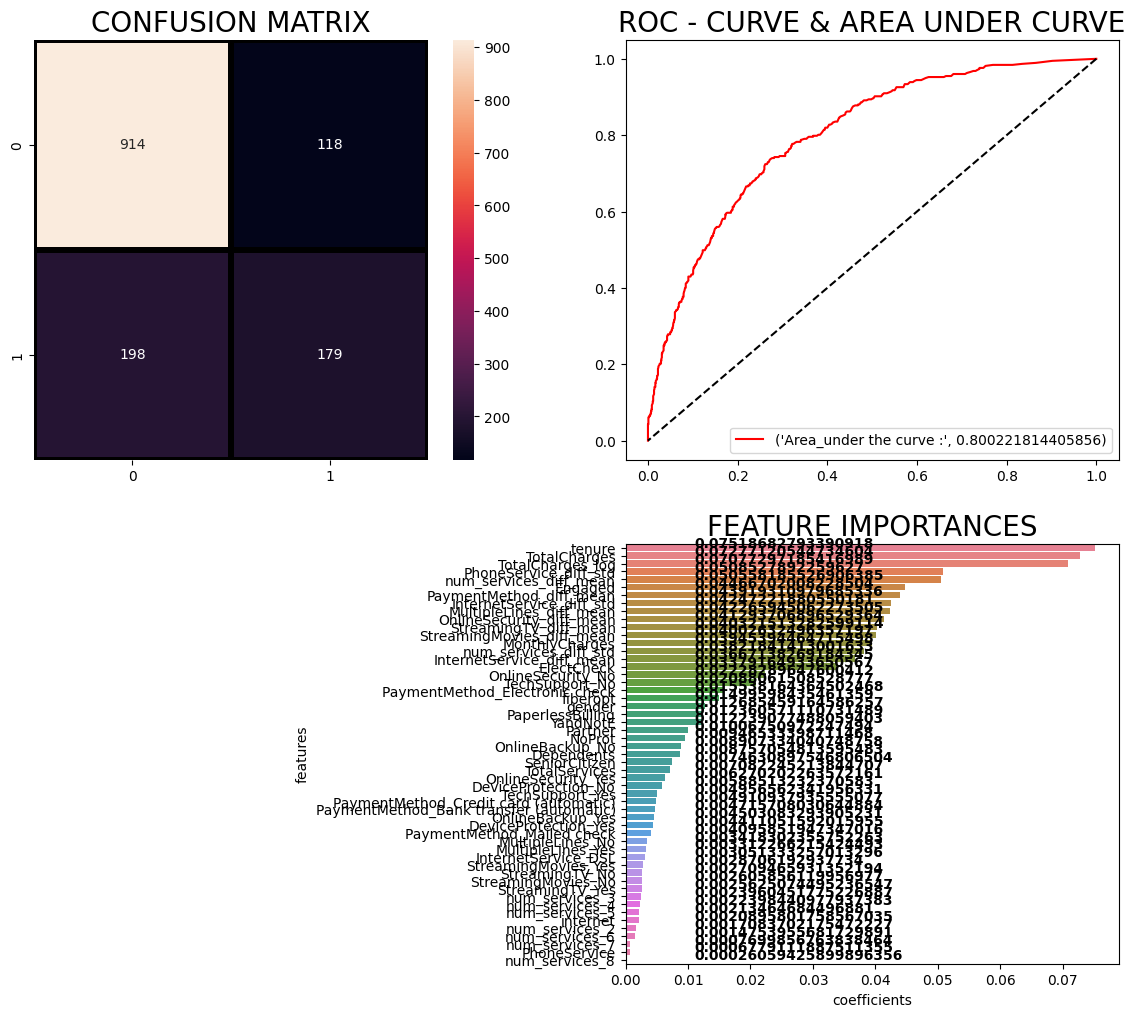

In [ ]:
rf =RandomForestClassifier(n_estimators=500)

model(rf,X_train, y_train,X_val, y_val, "feat")

*****************************************************************************************
MODEL - OUTPUT
*****************************************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression




accuracy_score : 0.7927608232789212

classification report :
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1032
           1       0.64      0.51      0.57       377

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

<ipython-input-51-ac67acf1c197>:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




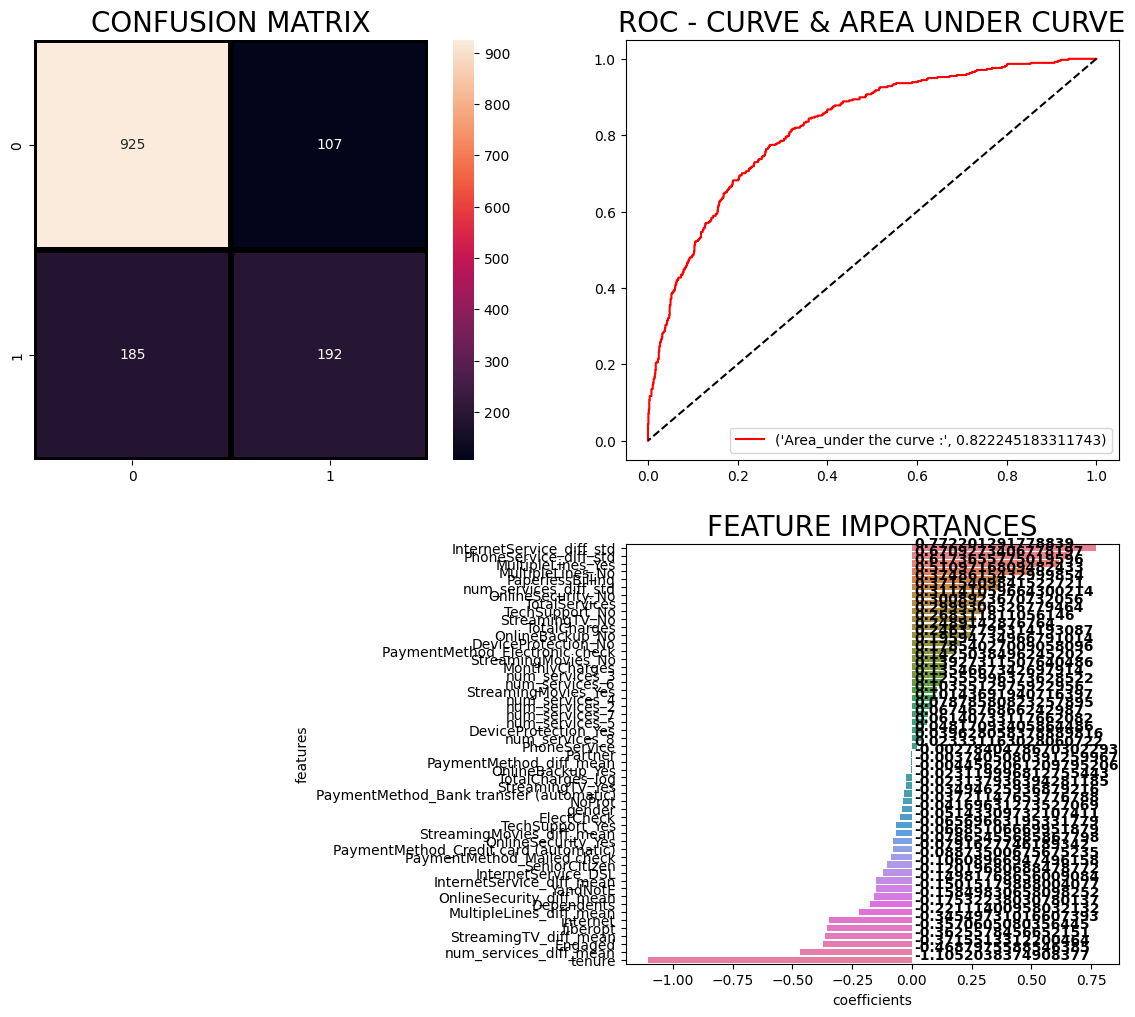

In [ ]:
rf =LogisticRegression(solver = "lbfgs", multi_class = "auto")

model(rf,X_train, y_train,X_val, y_val, "coef")